In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [5]:
df = pd.read_csv("car_dataset2.csv")

In [6]:
df

,CarID,Model,Brand,Year,EngineType,Mileage,Rating,Popularity,PriceINR
0,1,Model_1,Toyta,2014,Hydrogen,28.315765,3.144369,95,2751798
1,2,Model_2,Honda,2012,petrol,17.195882,4.320462,6,4799241
2,3,Model_3,Honda,2016,petrol,16.139446,1.625510,57,2984464
3,4,Model_4,Hyundai,2007,Diesel,13.903943,2.980320,1,7542644
4,5,Model_5,Hyundai,2017,Hydrogen,23.569823,3.172831,71,24700938
...,...,...,...,...,...,...,...,...,...
495,496,Model_496,Toyota,2011,diesel,25.217720,3.742777,64,3594888
496,497,Model_497,Honda,2012,diesel,10.854792,3.557944,20,8023965
497,498,Model_498,Ford,2010,Electric,NaN,4.563969,8,573253
498,499,Model_499,Toyota,2016,Diesel,12.373212,5.000000,58,1084745


In [7]:
df.shape

(500, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CarID       500 non-null    int64  
 1   Model       500 non-null    object 
 2   Brand       500 non-null    object 
 3   Year        500 non-null    int64  
 4   EngineType  500 non-null    object 
 5   Mileage     480 non-null    float64
 6   Rating      485 non-null    float64
 7   Popularity  500 non-null    int64  
 8   PriceINR    500 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 35.3+ KB


In [9]:
df.describe()

,CarID,Year,Mileage,Rating,Popularity,PriceINR
count,500.000000,500.000000,480.000000,485.000000,500.000000,5.000000e+02
mean,250.500000,2011.564000,19.663288,3.200450,54.332000,4.681758e+06
std,144.481833,6.469746,5.929558,1.200058,42.240339,3.841877e+06
min,1.000000,2000.000000,10.018588,1.017267,1.000000,4.365760e+05
25%,125.750000,2006.000000,14.523372,2.192866,26.750000,2.541788e+06
50%,250.500000,2012.000000,19.340968,3.201523,53.500000,4.343110e+06
75%,375.250000,2017.000000,24.884112,4.263792,75.250000,6.389188e+06
max,500.000000,2022.000000,29.912757,5.000000,439.000000,4.505876e+07


In [16]:
df.isnull().sum()

CarID          0
Model          0
Brand          0
Year           0
EngineType     0
Mileage       20
Rating        15
Popularity     0
PriceINR       0
dtype: int64

In [18]:
df['EngineType'] = df['EngineType'].str.title()
df['Brand'] = df['Brand'].str.title()

<Axes: >

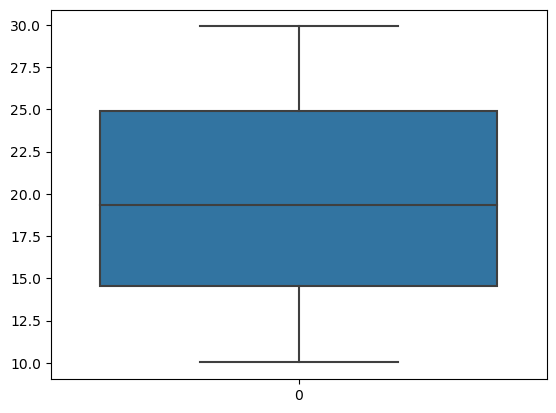

In [20]:
sns.boxplot(df['Mileage'])

<Axes: >

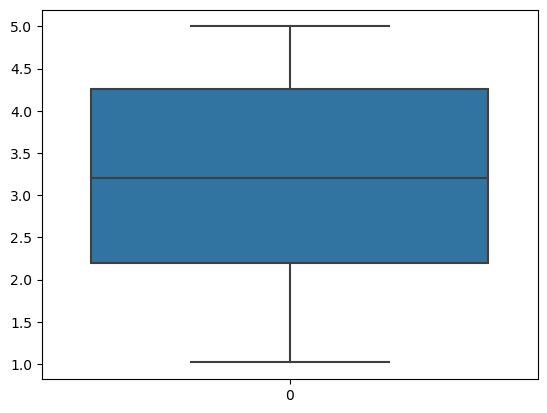

In [22]:
sns.boxplot(df['Rating'])

In [24]:
df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

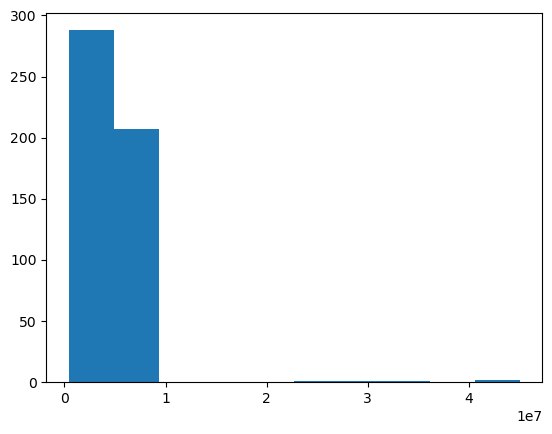

In [26]:
plt.hist(df["PriceINR"])
plt.show()

<Axes: >

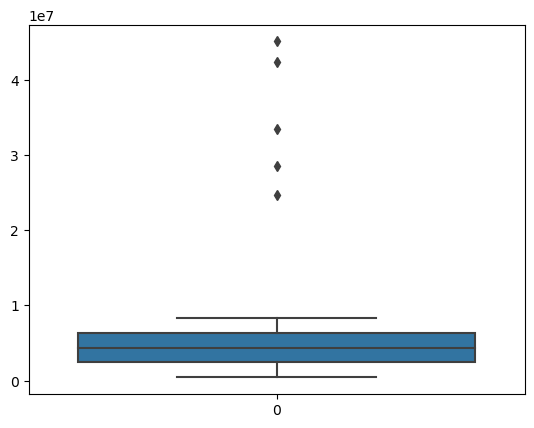

In [28]:
sns.boxplot(df['PriceINR'])

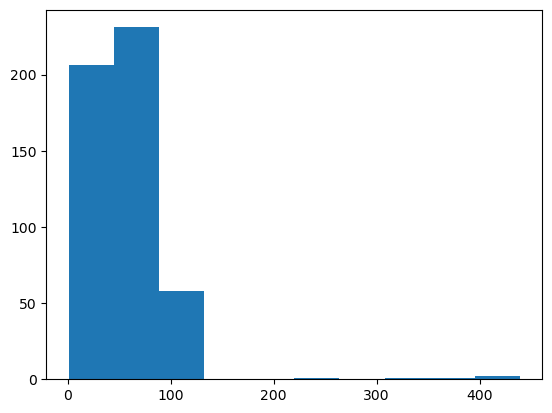

In [30]:
plt.hist(df["Popularity"])
plt.show()

<Axes: >

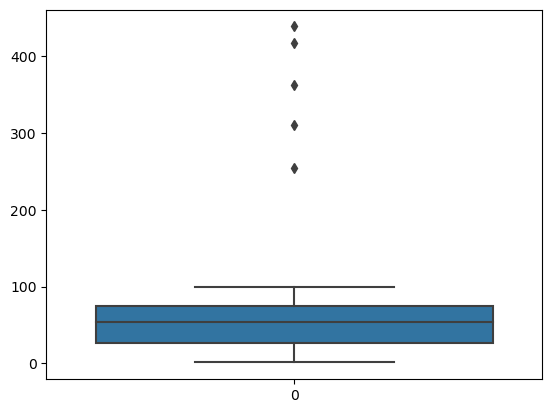

In [32]:
sns.boxplot(df['Popularity'])

In [34]:
  # 1st quartile
Q1 = np.percentile(df['PriceINR'],25)
        # 3rd quartile
Q3 = np.percentile(df['PriceINR'],75)
        # IQR
IQR = Q3 - Q1
        # Outlier step
positive_outlier=Q3+1.5*IQR
        

In [36]:
Q1

2541788.0

In [38]:
Q3

6389188.0

In [40]:
IQR

3847400.0

In [42]:
positive_outlier

12160288.0

In [44]:
outlier=df[df['PriceINR']>=12160288.0]=12160288.0

<Axes: >

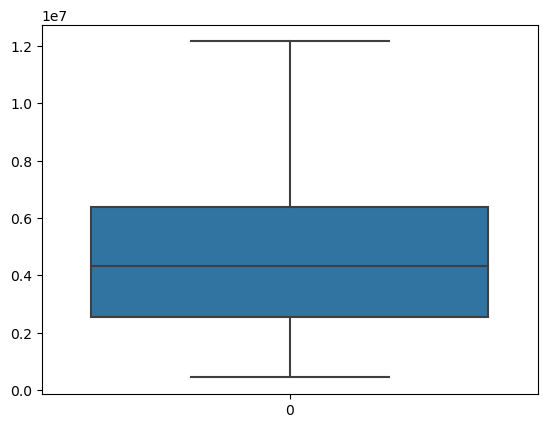

In [46]:
sns.boxplot(df['PriceINR'])

In [48]:
 # 1st quartile
Q1 = np.percentile(df['Popularity'],25)
        # 3rd quartile
Q3 = np.percentile(df['Popularity'],75)
        # IQR
IQR = Q3 - Q1
        # Outlier step
positive_outlier=Q3+1.5*IQR
        

In [50]:
Q1

26.75

In [52]:
Q3

76.0

In [54]:
IQR

49.25

In [56]:
positive_outlier

149.875

In [58]:
outlier=df[df['Popularity']>=149.875]=149.875

<Axes: >

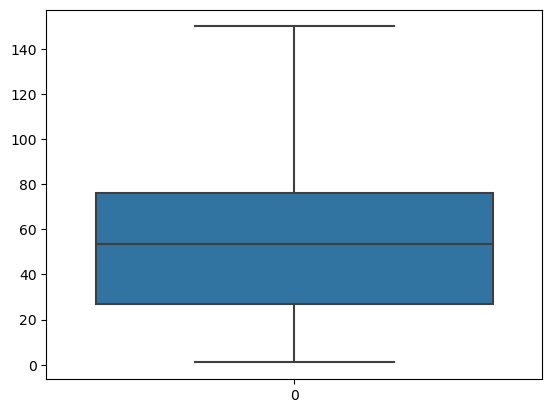

In [60]:
sns.boxplot(df['Popularity'])

In [62]:
from sklearn.preprocessing import LabelEncoder

In [64]:
label_encoder = LabelEncoder()
df['Brand'] = label_encoder.fit_transform(df['Brand'])
df['EngineType'] = label_encoder.fit_transform(df['EngineType'])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [66]:
print(df['Brand'].unique())


['Toyta' 'Honda' 'Hyundai' 149.875 'Tesla' 'Bmw' 'Ford' 'Toyota']


In [68]:
df = df[~df['Brand'].apply(lambda x: any(char.isdigit() for char in str(x)))]


print(df['Brand'].unique())

['Toyta' 'Honda' 'Hyundai' 'Tesla' 'Bmw' 'Ford' 'Toyota']


In [70]:
df.loc[:, 'Brand'] = label_encoder.fit_transform(df['Brand'])
df.loc[:, 'EngineType'] = label_encoder.fit_transform(df['EngineType'])


In [72]:
print("Data after label encoding:")
print(df[['Brand', 'EngineType']].head())


Data after label encoding:
  Brand EngineType
0     6          2
1     2          3
2     2          3
3     3          0
5     4          2


In [74]:
from sklearn.model_selection import train_test_split

In [76]:
X = df[['Brand', 'EngineType', 'Year', 'Mileage', 'Rating', 'Popularity']]

In [78]:
y = df['PriceINR']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (392, 6)
Testing set size: (99, 6)


In [84]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)      ## .fit store the values in backend
X_test =sc.transform(X_test)     
#standard scaler range is -3 to +3

In [86]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
y_train= sc.fit_transform(y_train)      ## .fit store the values in backend
y_test =sc.transform(y_test)     
#standard scaler range is -3 to +3

ValueError: Expected 2D array, got 1D array instead:
array=[6896377. 3267889.  843910. 1084745. 7636406. 8208604. 7577249. 8054563.
 5730135. 3326451. 1800049.  504743. 4165222. 3119489. 1371010. 3205353.
 4202132. 8047738. 2752180. 1173171. 2970517. 6439580. 4088336. 6757167.
 2064734. 5498247. 5391820. 6757211. 5475468. 7317066. 2582461. 2693214.
 7946844. 2328980. 4187515. 5192551. 3901444. 6696864. 7388627.  913095.
 5982248. 7756500. 5366904. 6898214. 7410919. 6404596. 1968749. 2736945.
 6674635. 7542644. 8153667. 4818428. 5739374. 4603695. 6087079. 3887696.
 1905424. 5331952. 5275774. 5295397. 3795889. 4650040. 5365860. 5937972.
 3768030. 2100124.  974119. 3075891. 6545158. 7707963. 4722910. 8002145.
 8157237. 4069250.  439363. 4452746. 7786858. 4849921. 3476316. 1922394.
 4185433. 3861839. 2920700. 5318467. 7408018. 3751640. 4326372. 2002514.
 1091935.  562631. 4508776. 2010123. 5755262.  839190. 6232676. 3372817.
 1806538. 2472017. 7985023. 1987732. 5057179. 8004434. 7945577. 6261737.
 3900862. 4895757. 3380483. 1173795.  865400. 4908122. 2383093. 5645169.
 6960064. 5712105. 5348229. 4224821. 8185032. 3584451. 8124824. 7552790.
 6279049. 7546390. 1250165. 4834713. 2664476. 3557536. 2262199. 5931825.
 5004369. 2118728. 5546991. 3475465. 4237069. 1300621. 4745453. 6543420.
 4080842. 6919938. 1745363. 4488332. 5889405. 4256185. 1129261. 6946423.
  654647. 2179688. 2772681. 7553512. 3737918. 3742775. 7702596. 5686810.
 2984464. 7982476. 3637026. 3127188. 7272590. 2757094. 7082051. 4425088.
 1020398. 7841187. 1924837. 2510598. 7271246. 2378957. 6488877. 4841111.
 5423772. 6723650. 3203302. 5569306.  674425. 5177315. 5208953. 7559718.
 7158571. 5679482. 7530643. 4629959. 4371558. 6987960. 8279394. 2758453.
  560693. 4281610.  573253.  985217. 2140240. 4687513. 5415738. 3234648.
 2535677. 2256049. 1760649. 7166978. 6210886. 6438378. 2176201. 4876595.
 6246052. 3270825. 4995784. 4522560. 7199483. 6413544. 2719310. 7578833.
 6287601. 2589749. 5432569. 5946522. 7947212. 3732657.  816072. 7371063.
 3447362. 5600356. 6641646. 3172398. 1194957. 3233767. 4618887. 4503077.
 5659012. 6986651. 2458683. 7781604. 2850296. 4712839. 3669449. 3802841.
 4540186. 1364133. 7578357. 5183026. 4527924.  997314. 4103190. 7036778.
 2601203. 6902447. 2460990. 7553534. 7555420. 1045458. 2573344. 4929153.
 7303105. 5288014. 4484305.  496171. 5302198. 5657165. 8221722. 5946052.
 4517622. 6402145. 2715457. 3178262. 2355593. 6868890. 6183212. 2292887.
 1582732. 4794845. 7232281. 6513915. 1877333. 2144187. 3684960. 2005346.
 5210817. 5460730. 3260376. 8258227. 5421729. 2472244. 1057911. 6875056.
 6013168. 3227789. 2141334. 3206338. 7302549. 8091431.  925609. 6384869.
 7138000. 3174374. 2598448. 3753669. 3425129. 5593652. 3656147. 2543825.
 7336824. 5988705. 6876990. 2979462. 3094244. 4343094. 5968294. 6884219.
 2053004. 3752031. 8072985. 4909893. 4046171. 2431307. 4212920. 1403651.
 4498501. 3792136. 4799241. 5829879. 5274633. 4360123. 4523949.  809798.
 3745263. 2215200. 6562454. 4451480. 1039152. 2510637. 2578769. 4508569.
  839632. 2370206. 3559787. 1313628. 7242968. 8273985. 3755444. 3875096.
 3122929. 6903000. 1616988. 3637989. 1158264. 5635585. 1553422. 5251161.
 6445079. 2969728. 7933162. 1976014. 5944554. 3992507. 8023965. 1166972.
 3528506. 3023026. 3867550. 1391264.  586236. 4899266.  649085. 5864604.
 5042163. 7765769. 3542555. 5875136. 2654155. 7565265. 6736001. 1210911.
 7345902. 5153696. 3012979.  675102. 5651441. 6233528. 2880849. 5924165.
 1325789. 8040280. 3538305. 4263444. 1960288. 8048164. 6540810. 3626369.
 8245620.  674427. 5128797. 5585988. 5861021. 7714243. 1775573. 4418031.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [88]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Reshape y_train and y_test to 2D arrays
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Now apply StandardScaler to y_train and y_test
y_train_scaled = sc.fit_transform(y_train)
y_test_scaled = sc.transform(y_test)

# Check the transformed values (Optional)
print("Scaled y_train:", y_train_scaled)
print("Scaled y_test:", y_test_scaled)


Scaled y_train: [[ 1.09550691]
 [-0.55819208]
 [-1.66293092]
 [-1.55316933]
 [ 1.43277831]
 [ 1.69356001]
 [ 1.40581725]
 [ 1.62335516]
 [ 0.56398711]
 [-0.5315022 ]
 [-1.22716646]
 [-1.81750774]
 [-0.14922871]
 [-0.62582602]
 [-1.42270283]
 [-0.58669313]
 [-0.13240682]
 [ 1.62024464]
 [-0.79322867]
 [-1.5128688 ]
 [-0.69372064]
 [ 0.88731972]
 [-0.18426983]
 [ 1.03206136]
 [-1.10653514]
 [ 0.45830316]
 [ 0.4097986 ]
 [ 1.03208141]
 [ 0.44792153]
 [ 1.28723773]
 [-0.87057883]
 [-0.82010268]
 [ 1.57426176]
 [-0.98610389]
 [-0.13906858]
 [ 0.3189809 ]
 [-0.26944667]
 [ 1.00457801]
 [ 1.31985197]
 [-1.63139956]
 [ 0.6788887 ]
 [ 1.48751167]
 [ 0.39844302]
 [ 1.09634413]
 [ 1.33001164]
 [ 0.87137561]
 [-1.15028071]
 [-0.80017209]
 [ 0.99444704]
 [ 1.39004588]
 [ 1.66852223]
 [ 0.14847273]
 [ 0.56819783]
 [ 0.05060724]
 [ 0.72666587]
 [-0.27571238]
 [-1.17914135]
 [ 0.3825135 ]
 [ 0.35691014]
 [ 0.3658534 ]
 [-0.31755381]
 [ 0.07172918]
 [ 0.39796722]
 [ 0.65870972]
 [-0.33025067]
 [-1.0904

In [90]:
y_train = y_train.ravel()  # Flatten the array for model training
y_test = y_test.ravel()

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [96]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - MSE: {mse_rf}, R^2: {r2_rf}')


Random Forest - MSE: 5905323841618.606, R^2: -0.11053034308505771


In [200]:
from xgboost import XGBRegressor


ModuleNotFoundError: No module named 'xgboost'

In [202]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 660.6 kB/s eta 0:03:10
   ---------------------------------------- 0.0/124.9 MB 393.8 kB/s eta 0:05:18
   ---------------------------------------- 0.1/124.9 MB 585.1 kB/s eta 0:03:34
   ---------------------------------------- 0.2/124.9 MB 985.7 kB/s eta 0:02:07
   ---------------------------------------- 0.4/124.9 MB 1.9 MB/s eta 0:01:07
   ---------------------------------------- 0.8/124.9 MB 3.1 MB/s eta 0:00:40
   ---------------------------------------- 1.5/124.9 MB 4.6 MB/s eta 0:00:27
    --------------------------------------- 2.2/124.9 MB 5.7 MB/s eta 0:00:22
    --------------------------------------- 3.0/124.9 MB 7.1 MB/s eta 0:00:18
   - ---------

In [98]:
from xgboost import XGBRegressor

In [100]:
xg_reg = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_reg.fit(X_train, y_train)
y_pred_xg = xg_reg.predict(X_test)

In [102]:
mse_xg = mean_squared_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)
print(f'XGBoost - MSE: {mse_xg}, R^2: {r2_xg}')

XGBoost - MSE: 7291441068692.311, R^2: -0.37119771392248024


In [108]:
from sklearn.model_selection import GridSearchCV

In [110]:
# XGBoost Hyperparameter Tuning
param_grid_xg = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

In [112]:
xg_reg = XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search_xg = GridSearchCV(estimator=xg_reg, param_grid=param_grid_xg, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_xg.fit(X_train, y_train)
best_xg_model = grid_search_xg.best_estimator_
y_pred_xg = best_xg_model.predict(X_test)


In [113]:
mse_xg = mean_squared_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)
print(f'XGBoost - MSE: {mse_xg}, R^2: {r2_xg}')


XGBoost - MSE: 5696922012644.354, R^2: -0.07133917239950649


In [116]:
# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [118]:
rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

In [120]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - MSE: {mse_rf}, R^2: {r2_rf}')

Random Forest - MSE: 5668619711485.757, R^2: -0.06601676078268004
